In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


### Visualizations

Values describe: 
Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


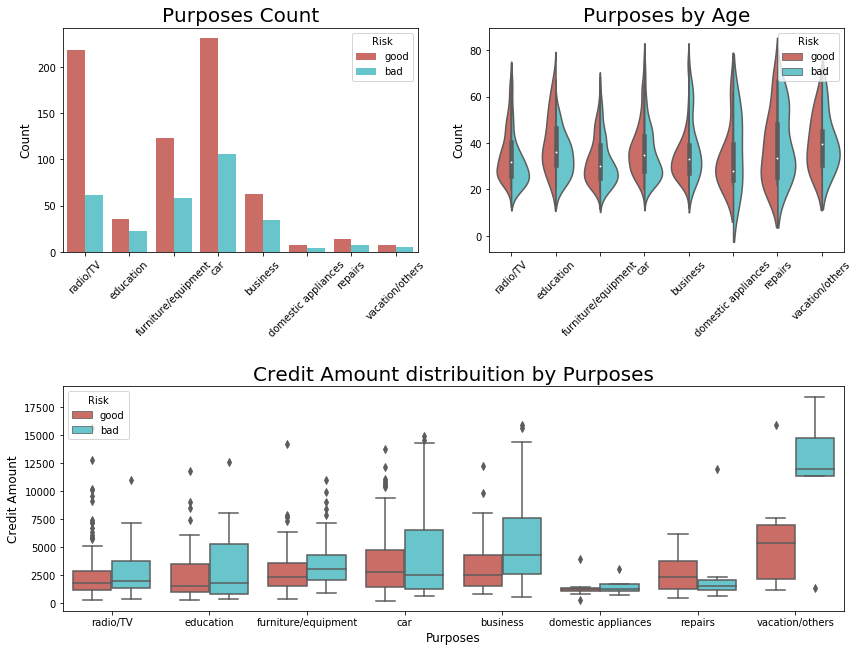

In [4]:
print("Values describe: ")
print(pd.crosstab(df.Purpose, df.Risk))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df, 
              palette="hls", hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Age", data=df, 
                    palette="hls", hue = "Risk",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Credit amount", data=df, 
               palette="hls", hue = "Risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

### One-Hot Encoding

In [5]:
cat_columns = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"]

In [6]:
df_processed = pd.get_dummies(df, prefix_sep="__",columns=cat_columns)
df_processed.head()

,Unnamed: 0,Age,Job,Credit amount,Duration,Risk,Sex__female,Sex__male,Housing__free,Housing__own,...,Checking account__moderate,Checking account__rich,Purpose__business,Purpose__car,Purpose__domestic appliances,Purpose__education,Purpose__furniture/equipment,Purpose__radio/TV,Purpose__repairs,Purpose__vacation/others
0,0,67,2,1169,6,good,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,22,2,5951,48,bad,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,2,49,1,2096,12,good,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,3,45,2,7882,42,good,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,53,2,4870,24,bad,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
cat_dummies = [col for col in df_processed 
               if "__" in col 
               and col.split("__")[0] in cat_columns]

In [8]:
processed_columns = list(df_processed.columns[:])

In [9]:
df_clean = df_processed.dropna()

In [10]:
#Drop first column
df_clean = df_processed.drop(['Unnamed: 0'],axis=1)

In [11]:
df_clean.head()

,Age,Job,Credit amount,Duration,Risk,Sex__female,Sex__male,Housing__free,Housing__own,Housing__rent,...,Checking account__moderate,Checking account__rich,Purpose__business,Purpose__car,Purpose__domestic appliances,Purpose__education,Purpose__furniture/equipment,Purpose__radio/TV,Purpose__repairs,Purpose__vacation/others
0,67,2,1169,6,good,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,bad,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,good,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,good,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,bad,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [12]:
#Slice Data
X = df_clean.loc[:, df_clean.columns != 'Risk']
y = df_clean.loc[:, df_clean.columns == 'Risk']
print("X.shape=",X.shape)
print("y.shape=",y.shape)

X.shape= (1000, 24)
y.shape= (1000, 1)


In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

## Trying Logistic Regression

In [14]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs')

# fit the model with data
logreg.fit(X_train, y_train)

# predict the response values for the observations in X
logreg.predict(X_test)

# store the predicted response values
y_pred = logreg.predict(X_test)

y_true = y_test


In [15]:
len(y_pred)

300

### Performance Measures

#### Accuracy Score

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.7133333333333334

#### Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0, multi_class='multinomial').fit(X, y)
clf.predict(X_test)
clf.score(X, y)
cross_val_score(logreg, X_train, y_train, cv=3, scoring="accuracy") 

array([0.69230769, 0.76824034, 0.67811159])

#### Confusion Matrix

In [18]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(logreg, X_train, y_train, cv=3)

In [19]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train, y_train_pred)

array([[ 87, 132],
       [ 69, 412]])

#### Precision and Recall

In [20]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score =",precision_score(y_train.values, y_train_pred, pos_label="good"))
print("Recall Score =",recall_score(y_train.values, y_train_pred, pos_label = "good"))

Precision Score = 0.7573529411764706
Recall Score = 0.8565488565488566


#### F1 Score

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, pos_label='good') 

0.8039024390243903

## Trying KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)

[0.6166666666666667, 0.5533333333333333, 0.65, 0.59, 0.6766666666666666, 0.6166666666666667, 0.6833333333333333, 0.6566666666666666, 0.69, 0.66, 0.6833333333333333, 0.6666666666666666, 0.6966666666666667, 0.6933333333333334, 0.7133333333333334, 0.7033333333333334, 0.7166666666666667, 0.71, 0.7133333333333334, 0.7033333333333334, 0.71, 0.71, 0.7266666666666667, 0.7233333333333334, 0.7266666666666667]


In [23]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [24]:
y_pred1 = knn.predict(X_test)

### Performance Measures

#### Accuracy Score

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred1)

0.7266666666666667

#### Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
knn_cv = KNeighborsClassifier(n_neighbors=17)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
print(cv_scores)

[0.69  0.685 0.695 0.68  0.68 ]


#### Confusion Matrix

In [27]:
y_train_pred1 = cross_val_predict(knn, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred1)

array([[ 24, 195],
       [ 20, 461]])

#### Precision and Recall

In [28]:
print("Precision Score =",precision_score(y_train.values, y_train_pred1, pos_label="good"))
print("Recall Score =",recall_score(y_train.values, y_train_pred1, pos_label = "good"))

Precision Score = 0.7027439024390244
Recall Score = 0.9584199584199584


#### F1 Score

In [29]:
f1_score(y_train, y_train_pred1, pos_label='good') 

0.810905892700088

In [30]:
#Looking at correlation matrix
corr = df_clean.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Job,Credit amount,Duration,Sex__female,Sex__male,Housing__free,Housing__own,Housing__rent,Saving accounts__little,Saving accounts__moderate,Saving accounts__quite rich,Saving accounts__rich,Checking account__little,Checking account__moderate,Checking account__rich,Purpose__business,Purpose__car,Purpose__domestic appliances,Purpose__education,Purpose__furniture/equipment,Purpose__radio/TV,Purpose__repairs,Purpose__vacation/others
Age,1,0.0156732,0.0327164,-0.0361364,-0.161694,0.161694,0.253058,0.00655266,-0.21262,-0.0440841,-0.0753015,0.0309879,0.0320069,-0.0111622,-0.0781215,0.0375039,-0.00177178,0.0999192,-0.0125622,0.0603904,-0.127657,-0.0464014,0.0395669,0.0423651
Job,0.0156732,1,0.285385,0.21091,-0.0702983,0.0702983,0.134972,-0.0593932,-0.0391952,-0.000350397,0.00447192,-0.0374989,-0.0171284,-0.026413,-0.00405946,-0.0500994,0.00161369,0.0367618,-0.0259794,-0.0216721,0.013422,-0.0276826,-0.0927511,0.100544
Credit amount,0.0327164,0.285385,1,0.624984,-0.0934824,0.0934824,0.201643,-0.117497,-0.0246109,-0.0364426,0.0135458,-0.0642563,-0.0555416,-0.0209123,0.119612,-0.10051,0.103016,0.125575,-0.0692677,-0.0347956,-0.0340366,-0.173203,-0.028875,0.192893
Duration,-0.0361364,0.21091,0.624984,1,-0.0814322,0.0814322,0.189117,-0.0751692,-0.0644171,-0.0472278,0.0515868,-0.0402574,-0.0482612,0.0222444,0.089452,-0.0764549,0.164113,-0.00532036,-0.0372121,-0.0254502,-0.0628037,-0.0443189,-0.0225494,0.104516
Sex__female,-0.161694,-0.0702983,-0.0934824,-0.0814322,1,-1,-0.100872,-0.119638,0.222845,0.0312435,0.000497941,-0.0314144,0.0416728,0.0148345,0.0127262,0.00418266,-0.0808747,-0.0478927,0.0452752,0.0523974,0.100467,-0.00866806,-0.0268278,-0.0142974
Sex__male,0.161694,0.0702983,0.0934824,0.0814322,-1,1,0.100872,0.119638,-0.222845,-0.0312435,-0.000497941,0.0314144,-0.0416728,-0.0148345,-0.0127262,-0.00418266,0.0808747,0.0478927,-0.0452752,-0.0523974,-0.100467,0.00866806,0.0268278,0.0142974
Housing__free,0.253058,0.134972,0.201643,0.189117,-0.100872,0.100872,1,-0.548445,-0.162474,0.0123533,-0.011914,-0.0106616,-0.0479888,0.0679609,-0.000377811,0.0158598,-0.0596128,0.126806,-0.0383479,0.117976,-0.0715301,-0.109357,0.013706,0.0800098
Housing__own,0.00655266,-0.0593932,-0.117497,-0.0751692,-0.119638,0.119638,-0.548445,1,-0.735968,0.000275607,-0.0177383,0.000736986,0.0287075,-0.125705,0.00101199,0.0189342,0.0510831,-0.0995256,0.0293165,-0.0756843,-0.0404955,0.134705,0.0198029,-0.0112881
Housing__rent,-0.21262,-0.0391952,-0.0246109,-0.0644171,0.222845,-0.222845,-0.162474,-0.735968,1,-0.0103271,0.0305776,0.00776247,0.00497878,0.0933099,-0.000888268,-0.0351834,-0.0120135,0.0147733,-0.00354564,-0.00621075,0.1057,-0.070414,-0.0344647,-0.0514597
Saving accounts__little,-0.0440841,-0.000350397,-0.0364426,-0.0472278,0.0312435,-0.0312435,0.0123533,0.000275607,-0.0103271,1,-0.417624,-0.319568,-0.276736,0.246438,-0.0470446,0.0253289,-0.0172024,-0.0657707,-0.0232004,-0.0136791,0.100101,0.000728318,0.0102273,0.0143407


In [31]:
#Both Knn and Log reg gave solid performance with one-hot encoding
#Correlation doesn't show anything too strange
#Since One-hot encoding was implmented from beginning, models seem sufficient

## Trying Decision Tree

In [32]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(min_samples_split=50, random_state=99)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [33]:
y_pred2 = dt.predict(X_test)

### Performance Measures

#### Accuracy Score

In [34]:
accuracy_score(y_true, y_pred2)

0.72

#### Cross Validation

In [35]:
parameters = {'max_depth':range(3,20)}
clf1 = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf1.fit(X, y)
tree_model = clf1.best_estimator_
print (clf1.best_score_, clf1.best_params_) 

0.73 {'max_depth': 4}


In [36]:
scores = cross_val_score(dt, X, y, cv=5)
scores

array([0.74 , 0.77 , 0.69 , 0.685, 0.735])

#### Confusion Matrix

In [37]:
y_train_pred2 = cross_val_predict(dt, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred2)

array([[102, 117],
       [ 64, 417]])

#### Precision and Recall

In [38]:
print("Precision Score =",precision_score(y_train.values, y_train_pred2, pos_label="good"))
print("Recall Score =",recall_score(y_train.values, y_train_pred2, pos_label = "good"))

Precision Score = 0.7808988764044944
Recall Score = 0.8669438669438669


#### F1 Score

In [39]:
f1_score(y_train, y_train_pred2, pos_label='good') 

0.8216748768472906

## Trying Naive Bayes

In [40]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

#Predict Output
y_pred3 = model.predict(X_test)

### Performance Measures

#### Accuracy Score

In [41]:
accuracy_score(y_true, y_pred3)

0.62

#### Cross Validation

In [42]:
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[0.69  0.65  0.665 0.715 0.685]


#### Confusion Matrix

In [43]:
y_train_pred3 = cross_val_predict(model, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred3)

array([[106, 113],
       [110, 371]])

#### Precision and Recall

In [44]:
print("Precision Score =",precision_score(y_train.values, y_train_pred3, pos_label="good"))
print("Recall Score =",recall_score(y_train.values, y_train_pred3, pos_label = "good"))

Precision Score = 0.7665289256198347
Recall Score = 0.7713097713097713


#### F1 Score

In [45]:
f1_score(y_train, y_train_pred3, pos_label='good') 

0.7689119170984456

In [46]:
#Overall, all models had similar performance with accuracy of about .72. Naive Bayes gave lowest accuracy.
#With one-hot encoding, every model was able to have solid performance, although there is room for improvement